In [1]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

In [2]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=())]

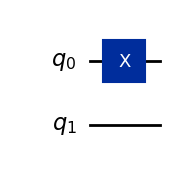

In [3]:
qc.draw("mpl")

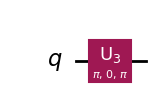

In [4]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw('mpl')

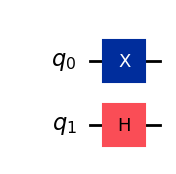

In [5]:
from qiskit.circuit.library import HGate
 
# qc = QuantumCircuit(1)
qc.append(HGate(), [1])
qc.draw("mpl")

In [6]:
qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)
 
#compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined = combined.compose(qc, qubits=[2, 3])
combined.draw()

┌───┐     
q_0: ┤ X ├─────
     ├───┤     
q_1: ┤ Y ├─────
     ├───┤     
q_2: ┤ X ├─────
     ├───┤┌───┐
q_3: ┤ Z ├┤ H ├
     └───┘└───┘

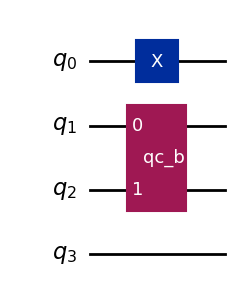

In [7]:
inst = qc_b.to_instruction()
qc_a.append(inst, [1, 2])
qc_a.draw("mpl")

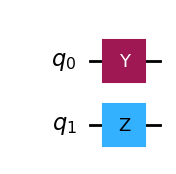

In [8]:
qc_b.draw('mpl')

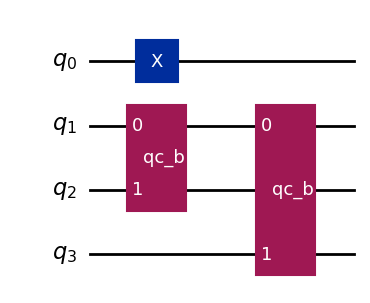

In [9]:
gate = qc_b.to_gate().control()
qc_a.append(gate, [2, 1, 3])
qc_a.draw("mpl")


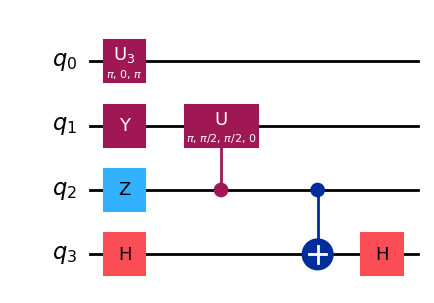

In [10]:
qc_a.decompose().draw("mpl")

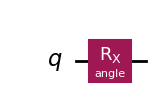

In [11]:
from qiskit.circuit import Parameter
angle = Parameter("angle")  # undefined number
 
# Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
qc.draw("mpl")

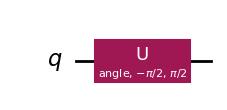

In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
qc = generate_preset_pass_manager(optimization_level=3, basis_gates=['u', 'cx']).run(qc)
 
qc.draw("mpl")

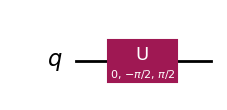

In [13]:
circuits = []
for value in range(100):
    circuits.append(
        qc.assign_parameters({ angle: value })
    )
circuits[0].draw("mpl")

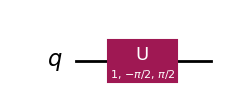

In [14]:
circuits[1].draw("mpl")

In [15]:
qc.parameters

ParameterView([Parameter(angle)])